# ----------------------------- # 1. Import Libraries # -----------------------------

In [8]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
import seaborn as sns
import matplotlib.pyplot as plt

# ----------------------------- # 2. Load Dataset # -----------------------------

In [9]:
df = pd.read_csv('/content/drive/MyDrive/Summary of Weather.csv', low_memory=False)
print(df.columns)

Index(['STA', 'Date', 'Precip', 'WindGustSpd', 'MaxTemp', 'MinTemp',
       'MeanTemp', 'Snowfall', 'PoorWeather', 'YR', 'MO', 'DA', 'PRCP', 'DR',
       'SPD', 'MAX', 'MIN', 'MEA', 'SNF', 'SND', 'FT', 'FB', 'FTI', 'ITH',
       'PGT', 'TSHDSBRSGF', 'SD3', 'RHX', 'RHN', 'RVG', 'WTE'],
      dtype='object')


# --------------------------- # 3. Clean Data # ---------------------------

In [10]:
# Convert 'Date' column
df['Date'] = pd.to_datetime(df['Date'], errors='coerce')

# Select numeric features
numeric_cols = ['Precip', 'WindGustSpd', 'MaxTemp', 'MinTemp', 'Snowfall']  # you can add more
df[numeric_cols] = df[numeric_cols].apply(pd.to_numeric, errors='coerce')

# Target variable
y = df['MeanTemp']

# Features
X = df[numeric_cols]

# Drop rows with missing values
data = pd.concat([X, y], axis=1).dropna()
X = data[numeric_cols]
y = data['MeanTemp']



# --------------------------- # 4. Train-Test Split # ---------------------------

In [12]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)



# --------------------------- # 5. Model Training # ---------------------------

In [17]:
lr = LinearRegression()
lr.fit(X_train, y_train)




LinearRegression()

# --------------------------- # 6. Prediction # ---------------------------

In [14]:
y_pred = lr.predict(X_test)


# -------------------------- # 7. Model Accuracy Metrics # --------------------------

In [15]:
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("Mean Squared Error:", mse)
print("R² Score:", r2)



Mean Squared Error: 0.019201477037428458
R² Score: 0.9987823139875811


# -------------------------- # 8. Coefficients print #--------------------------

In [16]:
coeff_df = pd.DataFrame(lr.coef_, X.columns, columns=['Coefficient'])
print(coeff_df)


             Coefficient
Precip          0.000025
WindGustSpd    -0.000205
MaxTemp         0.498792
MinTemp         0.500550
Snowfall        0.000000


# -------------------------- # 9. Correlation Heatmap #--------------------------

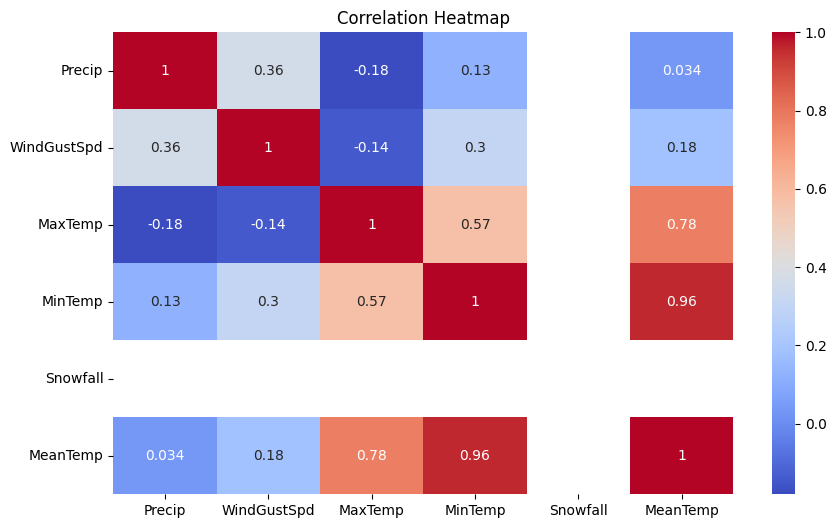

In [18]:
plt.figure(figsize=(10,6))
sns.heatmap(data.corr(), annot=True, cmap='coolwarm')
plt.title("Correlation Heatmap")
plt.show()

# -------------------------- # 10. Pairplot (Scatter matrix)#--------------------------

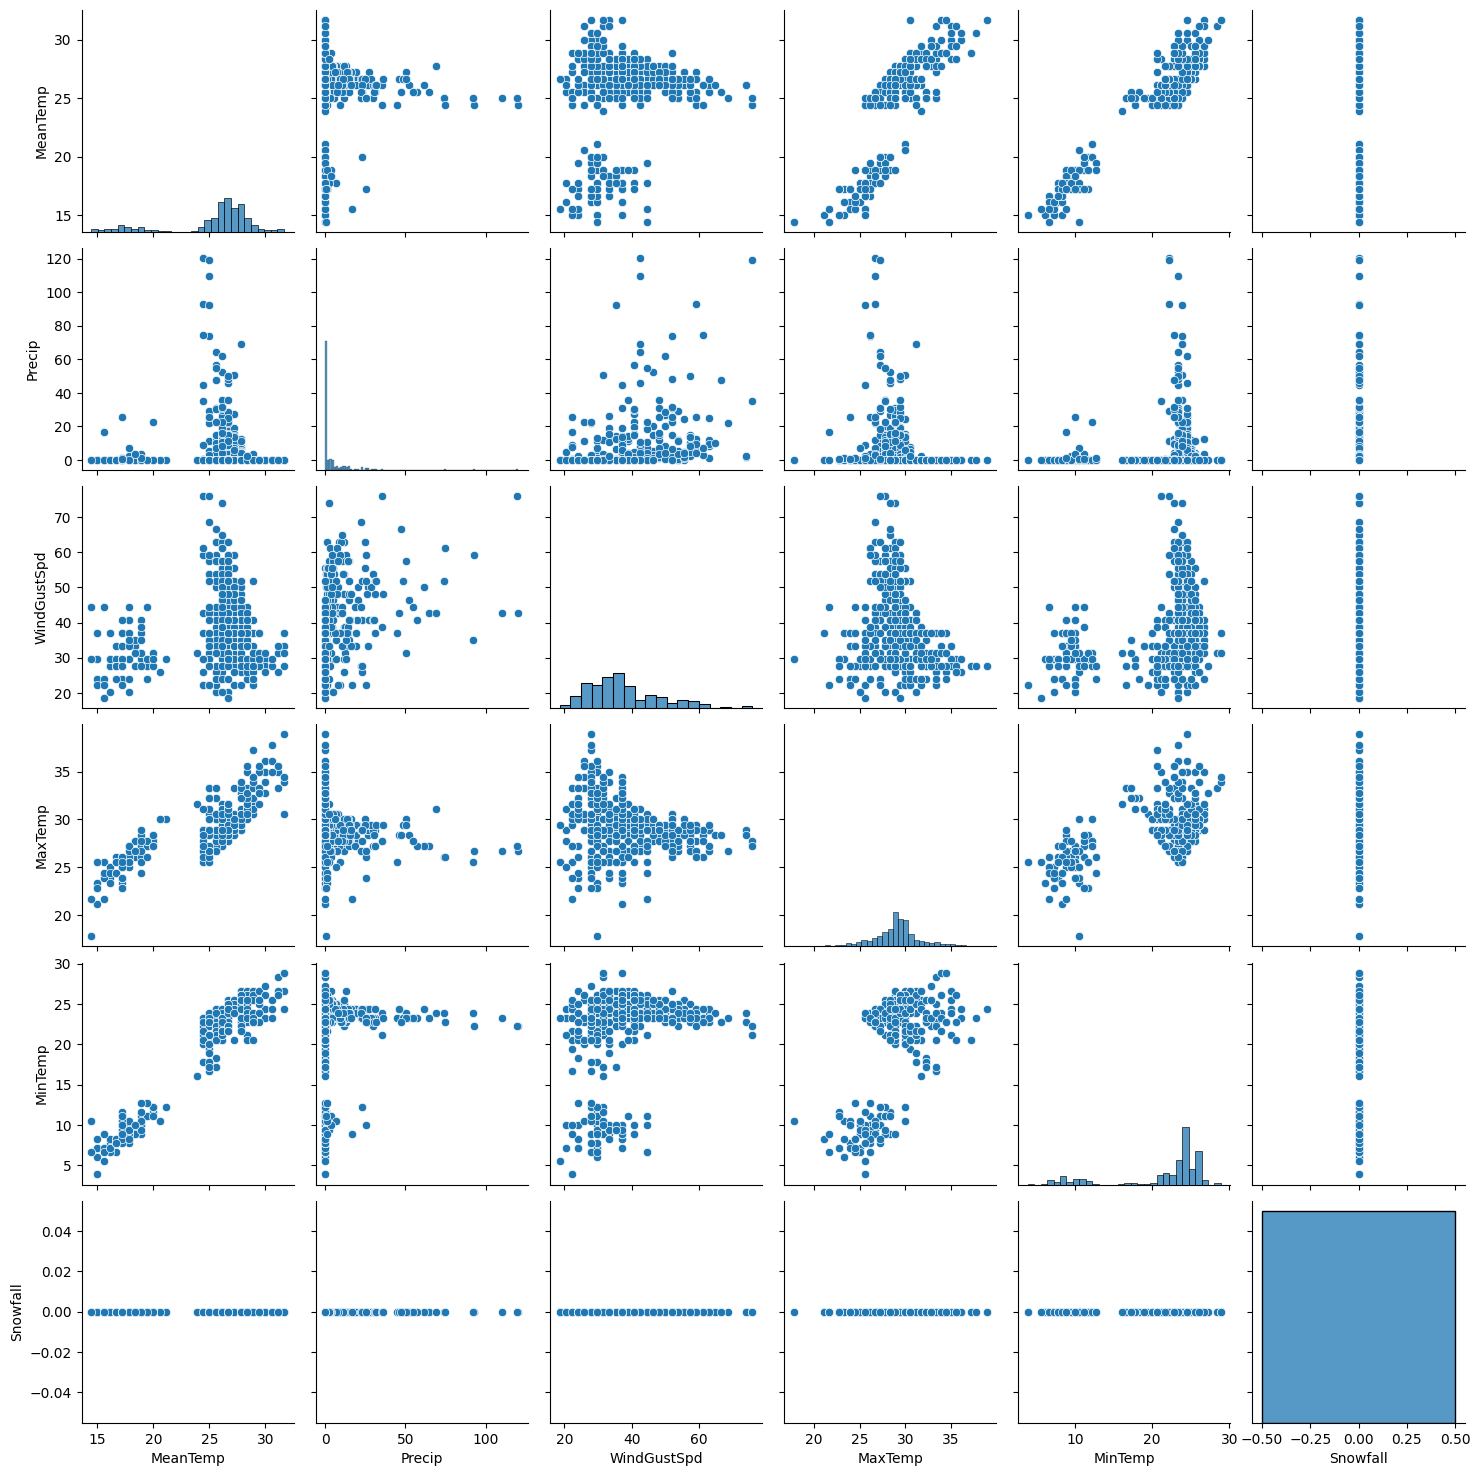

In [23]:
sns.pairplot(data[['MeanTemp','Precip','WindGustSpd','MaxTemp','MinTemp','Snowfall']])
plt.show()

# -------------------------- # 11. Actual vs Predicted Plot #--------------------------

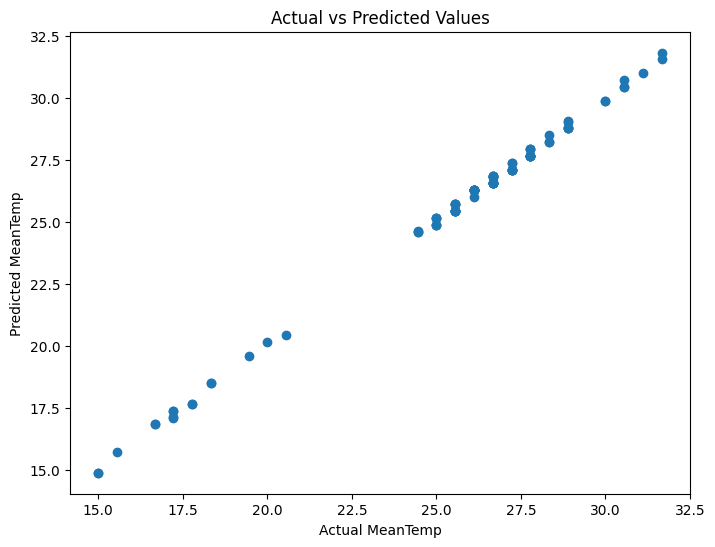

In [20]:
plt.figure(figsize=(8,6))
plt.scatter(y_test, y_pred)
plt.xlabel("Actual MeanTemp")
plt.ylabel("Predicted MeanTemp")
plt.title("Actual vs Predicted Values")
plt.show()

# -------------------------- # 12. Residual Plot #--------------------------

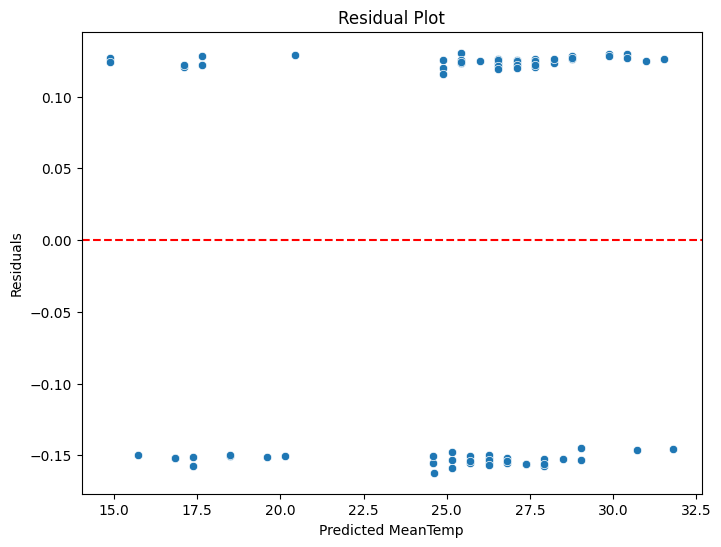

In [21]:
residuals = y_test - y_pred

plt.figure(figsize=(8,6))
sns.scatterplot(x=y_pred, y=residuals)
plt.axhline(0, color='red', linestyle='--')
plt.xlabel("Predicted MeanTemp")
plt.ylabel("Residuals")
plt.title("Residual Plot")
plt.show()

# ----------------- # 13. Regression Line (MaxTemp vs MeanTemp) # -----------------

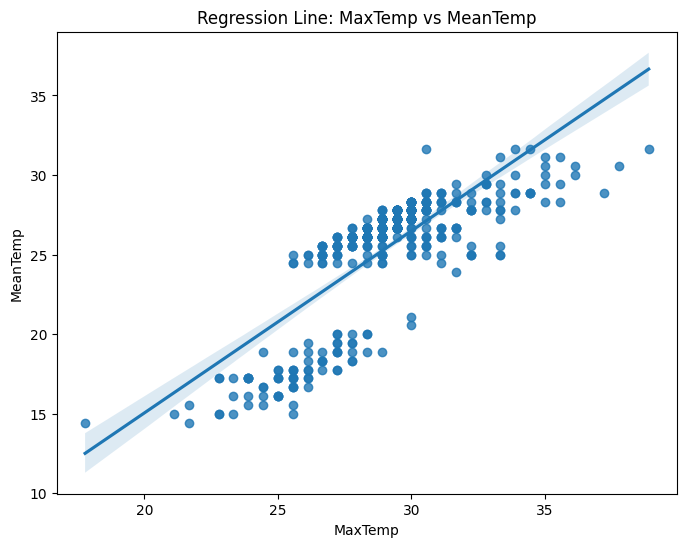

In [22]:
plt.figure(figsize=(8,6))
sns.regplot(x=data['MaxTemp'], y=data['MeanTemp'])
plt.title("Regression Line: MaxTemp vs MeanTemp")
plt.show()